In [3]:
library(tidyverse) # metapackage of all tidyverse packages
# suppress startup messages at package load
suppressPackageStartupMessages(library(tidyverse))
library(dplyr)
library(ggplot2)
list.files(path = "../input")
library(scales)
library(maps)

[1] "covid19-data-from-john-hopkins-university"

<font size="6"> Introduction </font>

The following analysis is conducted on the dataset of COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU). In this study, the information of global confirmed cases and global death counts will be utilized. The dataset can be founded in https://github.com/CSSEGISandData/COVID-19

<font size="6"> Questions of Interest </font>

Q1: What are the top-10 countries with the most confirmed cases? <br>
Q2: What are the top-10 countries with the most death counts? <br>

In [4]:
#options(warn=-1)
dir <- '../input/covid19-data-from-john-hopkins-university/'
confirmed_g <- 'RAW_global_confirmed_cases.csv'
gconf_dir <- paste(dir,confirmed_g,sep="")
gconf <- read_csv(gconf_dir,show_col_types = FALSE,col_names = TRUE)

head(gconf,10)

death_g <- 'RAW_global_deaths.csv'
gdeath_dir <- paste(dir,death_g,sep="")
gdeath <- read_csv(gdeath_dir,show_col_types = FALSE,col_names = TRUE)



Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,33.93911,67.70995,0,0,0,0,0,0,⋯,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,NA,41.15330,20.16830,0,0,0,0,0,0,⋯,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,NA,28.03390,1.65960,0,0,0,0,0,0,⋯,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,NA,42.50630,1.52180,0,0,0,0,0,0,⋯,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,NA,-11.20270,17.87390,0,0,0,0,0,0,⋯,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
Antarctica,NA,-71.94990,23.34700,0,0,0,0,0,0,⋯,11,11,11,11,11,11,11,11,11,11
Antigua and Barbuda,NA,17.06080,-61.79640,0,0,0,0,0,0,⋯,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
Argentina,NA,-38.41610,-63.61670,0,0,0,0,0,0,⋯,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
Armenia,NA,40.06910,45.03820,0,0,0,0,0,0,⋯,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308


In [5]:
drop <- c("Province/State","Lat","Long")
gconf <- gconf[,!(names(gconf) %in% drop)]
head(gconf)

Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,⋯,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0,0,0,0,0,0,0,0,0,⋯,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,⋯,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,⋯,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,⋯,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,⋯,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
Antarctica,0,0,0,0,0,0,0,0,0,⋯,11,11,11,11,11,11,11,11,11,11


In [6]:
dates <- names(gconf)[2:ncol(gconf)]
dates <- as.Date(dates,format='%m/%d/%y')
sort_idxs <- which(dates == "2022-12-31")



In [7]:
drop <- c("Province/State","Lat","Long")
gdeath <- gdeath[,!(names(gdeath) %in% drop)]
head(gdeath,10)

Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,⋯,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0,0,0,0,0,0,0,0,0,⋯,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,⋯,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,⋯,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,⋯,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,⋯,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
Antarctica,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,⋯,146,146,146,146,146,146,146,146,146,146
Argentina,0,0,0,0,0,0,0,0,0,⋯,130463,130463,130463,130463,130463,130463,130472,130472,130472,130472
Armenia,0,0,0,0,0,0,0,0,0,⋯,8721,8721,8721,8721,8721,8721,8721,8721,8727,8727


<font size="6"> Bias identification: Records of some countries come with duplicate rows of entry. It is essential to keep the latest one with the most updated number. </font>

In [8]:
aa <- gconf[order(gconf["Country/Region"], abs(gconf[ncol(gconf)]) ), ]
gconf <- gconf[!duplicated(aa["Country/Region"]), ]
dim(gconf)

bb <- gdeath[order(gdeath["Country/Region"], abs(gdeath[ncol(gdeath)]) ), ]
gdeath <- gdeath[!duplicated(bb["Country/Region"]), ]
dim(gdeath)

all.equal(gconf["Country/Region"], gdeath["Country/Region"])

[1]  201 1144

[1]  201 1144

[1] TRUE

In [9]:
desc_gconf <- gconf[order(gconf[sort_idxs],decreasing=TRUE),]
head(desc_gconf,10)
top_10_conf <- desc_gconf[["Country/Region"]][1:10]
print(top_10_conf)

Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,⋯,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,1,1,2,2,5,5,5,6,6,⋯,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702
India,0,0,0,0,0,0,0,0,1,⋯,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
Germany,0,0,0,0,0,1,4,4,4,⋯,38168908,38189954,38202571,38210850,38210850,38210851,38210851,38231610,38241231,38249060
Brazil,0,0,0,0,0,0,0,0,0,⋯,37052936,37063464,37063464,37081209,37081209,37081209,37076053,37076053,37076053,37076053
Japan,2,2,2,2,4,4,7,7,11,⋯,33227230,33241180,33252686,33263208,33273639,33282370,33286633,33298799,33310604,33320438
"Korea, South",1,1,2,2,3,4,4,4,4,⋯,30526012,30533573,30543981,30555102,30555102,30569215,30581499,30594297,30605187,30615522
Italy,0,0,0,0,0,0,0,0,0,⋯,25576852,25576852,25576852,25603510,25603510,25603510,25603510,25603510,25603510,25603510
United Kingdom,0,0,0,0,0,0,0,0,0,⋯,24370150,24370150,24396530,24396530,24396530,24396530,24396530,24396530,24396530,24425309
Russia,0,0,0,0,0,0,0,0,0,⋯,21960719,21974098,21988110,22002485,22016406,22029824,22040875,22051220,22063473,22075858


 [1] "US"             "India"          "Germany"        "Brazil"        
 [5] "Japan"          "Korea, South"   "Italy"          "United Kingdom"
 [9] "Russia"         "Turkey"        


In [10]:
desc_gdeath <- gdeath[order(gdeath[sort_idxs],decreasing=TRUE),]
head(desc_gdeath,10)
top_10_death <- desc_gdeath[["Country/Region"]][1:10]
print(top_10_death)

Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,⋯,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,0,0,0,0,0,0,0,0,0,⋯,1119917,1120897,1121658,1122165,1122172,1122134,1122181,1122516,1123246,1123836
Brazil,0,0,0,0,0,0,0,0,0,⋯,699087,699197,699197,699276,699276,699276,699276,699276,699276,699276
India,0,0,0,0,0,0,0,0,0,⋯,530772,530772,530772,530775,530775,530775,530775,530775,530776,530779
Russia,0,0,0,0,0,0,0,0,0,⋯,388126,388163,388201,388240,388278,388320,388355,388396,388440,388478
Mexico,0,0,0,0,0,0,0,0,0,⋯,332988,333038,333038,333038,333096,333100,333100,333136,333170,333188
Peru,0,0,0,0,0,0,0,0,0,⋯,219439,219448,219478,219485,219493,219493,219513,219513,219539,219539
United Kingdom,0,0,0,0,0,0,0,0,1,⋯,219948,219948,219948,219948,219948,219948,219948,219948,219948,219948
Italy,0,0,0,0,0,0,0,0,0,⋯,188094,188094,188094,188322,188322,188322,188322,188322,188322,188322
Germany,0,0,0,0,0,0,0,0,0,⋯,168086,168175,168296,168397,168397,168397,168397,168709,168808,168935


 [1] "US"             "Brazil"         "India"          "Russia"        
 [5] "Mexico"         "Peru"           "United Kingdom" "Italy"         
 [9] "Germany"        "Indonesia"     


In [11]:
dates <- names(gconf)[2:ncol(gconf)]
dates <- as.Date(dates,format='%m/%d/%y')
dates_range_idxs <- which(dates >= "2020-06-01" & dates <= "2022-12-31")
dates_range <- dates[dates_range_idxs]
dates_len <- length(dates)
dates_range_len <- length(dates_range_idxs)
#dates_range_idxs
countries <- gconf[["Country/Region"]]
countries_len <- length(countries)

top_conf_idxs <- c()
top_death_idxs <- c()
for (i in 1:10)
{
    top_conf_idxs <- c(top_conf_idxs,which(countries %in% top_10_conf[i]))
    top_death_idxs <- c(top_death_idxs,which(countries %in% top_10_death[i]))
}
#top_conf_idxs

#match(top_10_conf, top_conf_idxs)
#match(top_10_death, top_death_idxs)

In [12]:
nconfd_cols <- c("Country/Region","Date","Confirmed","Death")
nconfd <- data.frame(matrix(nrow = dates_range_len*countries_len, ncol = length(nconfd_cols)))
colnames(nconfd) <- nconfd_cols

#dates_range

nconfd["Country/Region"]<- rep(countries, each = dates_range_len)
nconfd["Date"]<- rep(dates_range,times = countries_len)
nconfd["Confirmed"]<- as.vector(t(data.matrix(gconf[,dates_range_idxs])))
nconfd["Death"]<- as.vector(t(data.matrix(gdeath[,dates_range_idxs])))

head(nconfd)
dim(nconfd)
#nconfd[944,]
#nconfd[1888,]
#dim(nconfd_afg)
#ggplot(data=nconfd_afg, aes(x=Date, y=Confirmed,group = 1)) + geom_point() +
#  scale_x_date(date_breaks = "6 month", labels = date_format("%b %y"))

,Country/Region,Date,Confirmed,Death
,<chr>,<date>,<dbl>,<dbl>
1,Afghanistan,2020-06-01,15180,254
2,Afghanistan,2020-06-02,15836,269
3,Afghanistan,2020-06-03,16578,274
4,Afghanistan,2020-06-04,17353,298
5,Afghanistan,2020-06-05,17977,303
6,Afghanistan,2020-06-06,19055,313


[1] 189744      4

In [21]:
nconf_top_cols <- append("Date",top_10_conf)
len_dates_range <- length(dates_range_idxs)
nconf_top <- data.frame(matrix(nrow = len_dates_range, ncol = length(nconf_top_cols)))
colnames(nconf_top) <- nconf_top_cols

date_len_idxs <- 1:length(dates_range_idxs)
#date_len_idxs
nconf_top[,1] <- dates_range
#length(dates_range_idxs)
for (i in 2:length(nconf_top_cols))
{
    curr_country <- top_conf_idxs[i-1]
    nconf_top[,nconf_top_cols[i]]  <-nconfd[(len_dates_range*(curr_country-1)+1):(len_dates_range*curr_country),3]
}
#top_conf_idxs
head(nconf_top)

,Date,US,India,Germany,Brazil,Japan,"Korea, South",Italy,United Kingdom,Russia,Turkey
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-01,1791547,190609,181482,516137,16741,11503,232997,256145,405843,163942
2,2020-06-02,1809384,198370,181815,531286,16778,11541,233197,257579,414328,164769
3,2020-06-03,1829340,207191,182028,562963,16829,11590,233515,259046,423186,165555
4,2020-06-04,1848388,216824,182370,589048,16858,11629,233836,260388,431715,166422
5,2020-06-05,1876099,226713,182764,621002,16902,11668,234013,261622,440538,167410
6,2020-06-06,1902280,236184,183271,653103,16949,11719,234531,262727,449256,168340


<font size="6"> Figure 1: Top 10 countries of the confirmed cases as of 2022-12-31. </font>

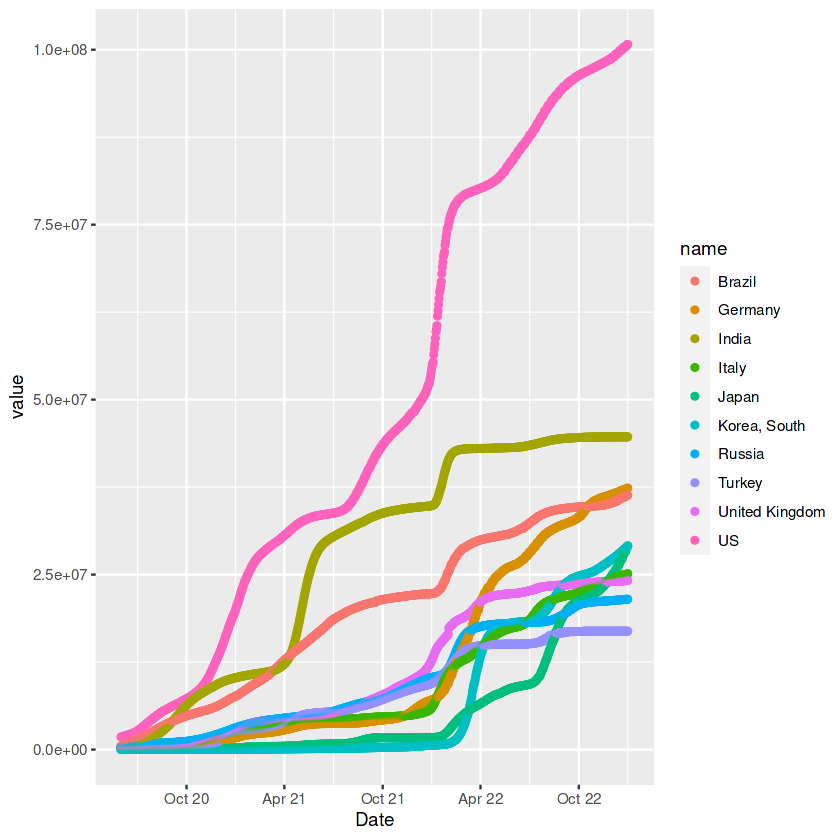

In [14]:
#ggplot(data=nconfd_afg, aes(x=Date, y=Confirmed,group = 1)) + geom_point() + scale_x_date(date_breaks = "6 month", labels = date_format("%b %y"))
nconf_top %>% 
  pivot_longer(!Date) %>%
  ggplot(aes(x = Date, y= value, color = name)) +
  geom_point()+ scale_x_date(date_breaks = "6 month", labels = date_format("%b %y"))

In [20]:
ndeath_top_cols <- append("Date",top_10_death)
len_dates_range <- length(dates_range_idxs)
ndeath_top <- data.frame(matrix(nrow = len_dates_range, ncol = length(ndeath_top_cols)))
colnames(ndeath_top) <- ndeath_top_cols

date_len_idxs <- 1:length(dates_range_idxs)
#date_len_idxs
ndeath_top[,1] <- dates_range
#length(dates_range_idxs)
for (i in 2:length(ndeath_top_cols))
{
    curr_country <- top_death_idxs[i-1]
    ndeath_top[,ndeath_top_cols[i]]  <-nconfd[(len_dates_range*(curr_country-1)+1):(len_dates_range*curr_country),4]
}
#top_death_idxs
head(ndeath_top)

,Date,US,Brazil,India,Russia,Mexico,Peru,United Kingdom,Italy,Germany,Indonesia
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-01,107857,29367,5408,4693,9930,20710,52487,33415,8500,1613
2,2020-06-02,108624,30108,5608,4849,10167,21278,52686,33475,8511,1641
3,2020-06-03,109603,31473,5829,5031,10637,21938,52919,33530,8522,1663
4,2020-06-04,110603,32667,6088,5208,11729,22476,53122,33601,8551,1698
5,2020-06-05,111601,34177,6363,5376,12545,23025,53305,33689,8581,1721
6,2020-06-06,112471,35253,6649,5520,13170,23640,53489,33774,8613,1770


<font size="6"> Figure 2: Top 10 countries of the death counts as of 2022-12-31. </font>

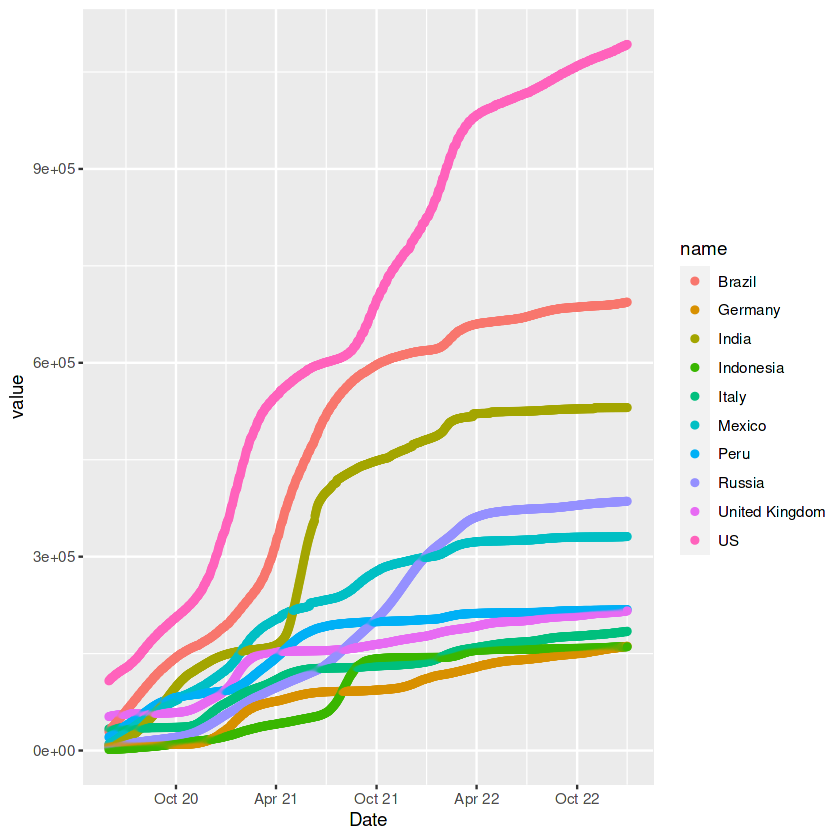

In [16]:
ndeath_top %>% 
  pivot_longer(!Date) %>%
  ggplot(aes(x = Date, y= value, color = name)) +
  geom_point()+ scale_x_date(date_breaks = "6 month", labels = date_format("%b %y"))

<font size="6">  Figure 3: Top 10 countries of the confirmed cases as of 2022-12-31 by a global heatmap. </font>

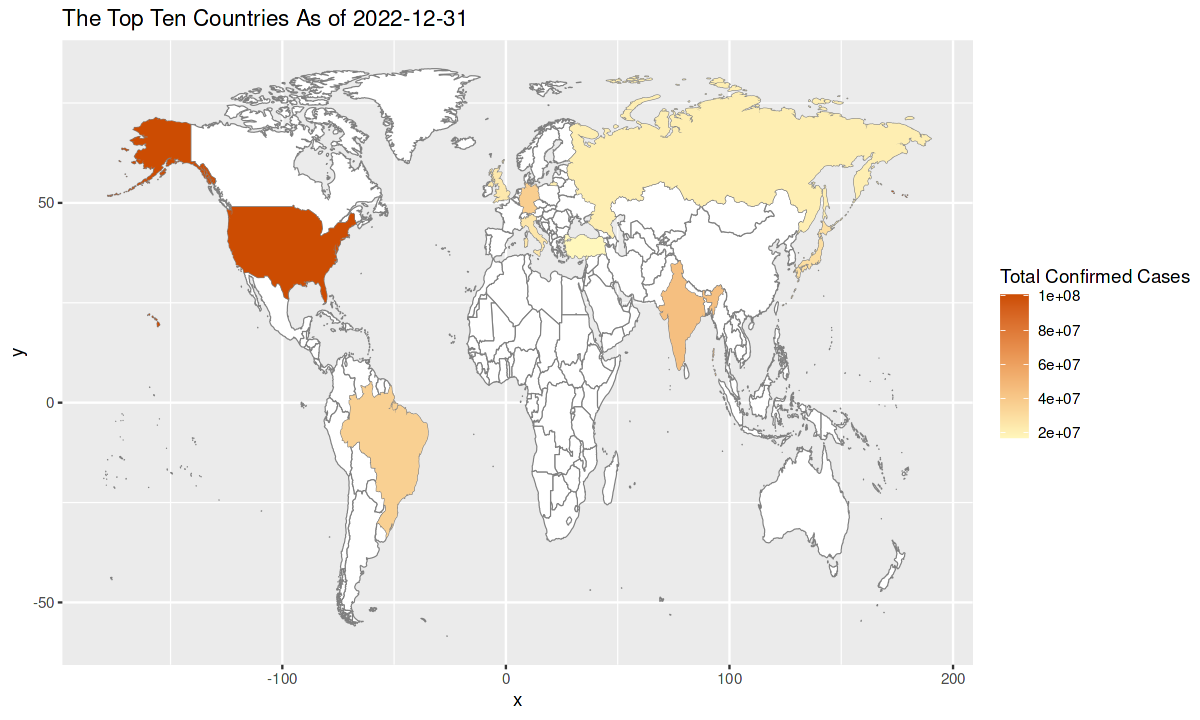

In [17]:
map_top_cols <- top_10_conf
map_top_cols <- replace(map_top_cols, map_top_cols == 'US', 'USA')
map_top_cols <- replace(map_top_cols, map_top_cols == 'United Kingdom', 'UK')

lconf_top <- data.frame(
  map_id = map_top_cols,
  fill = as.matrix(unlist(nconf_top[len_dates_range,2:ncol(nconf_top)], use.names = FALSE))
)

#lconf_top

world_map <- map_data("world")
world_map <- subset(world_map, region != "Antarctica")

options(repr.plot.width = 10, repr.plot.height =6)

ggplot(lconf_top) +
  geom_map(
    dat = world_map, map = world_map, aes(map_id = region),
    fill = "white", color = "#7f7f7f", linewidth = 0.25
  ) +
  geom_map(map = world_map, aes(map_id = map_id, fill = fill), linewidth = 0.25) +
  scale_fill_gradient(low = "#fff7bc", high = "#cc4c02", name = "Total Confirmed Cases") +
  expand_limits(x = world_map$long, y = world_map$lat)+ggtitle("The Top Ten Countries As of 2022-12-31")


<font size="6"> Modeling: Predicting Death Counts from Confirmed Cases </font>

In [18]:
# Select Rows by column value
nconfd_lastday <- nconfd[nconfd$Date == '2022-12-31',]
#nconfd_lastday

lm_lastday <- lm(Death~Confirmed, data = nconfd_lastday)
glm_lastday <- glm(Death~Confirmed, data = nconfd_lastday,family = "poisson")

# Adjusted R-squared value 
summary(lm_lastday)$adj.r.squared
# McFadden’s R-squared value
with(summary(glm_lastday), 1 - deviance/null.deviance)

[1] 0.7957115

[1] 0.5080293

R-squared values indicate that both the linear regression and poisson regression are generally good fits.

<font size = "6">Conclusion</font>

In this study, the top-10 countries with the most confirmed cases and death counts are identified. Line charts are plotted to show the total cases of those countries by date. A heatmap is applied to identify these countries geographically. Only 7 countries are among the top-10 of the most confirmed cases and death counts at the same time. Finally, regression models are created to assess if predicting death counts from confirmed cases could be a good fit. 